In [2]:
from scipy.ndimage.interpolation import map_coordinates, zoom

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import struct
import scipy.ndimage
from scipy.ndimage.interpolation import zoom as zoom
from scipy.ndimage.interpolation import map_coordinates

import torch
import torch.nn as nn
import torch.nn.functional as F

print(torch.__version__)
import sys
import time
from scipy.ndimage import distance_transform_edt as edt

A = torch.ones(64,64).cuda()
A.requires_grad = True
A.sum().backward()
sys.path.append('./voxelmorph/pytorch/')
import losses
print(losses.mind_loss)

def gpu_usage():
    print('gpu usage (current/max): {:.2f} / {:.2f} GB'.format(torch.cuda.memory_allocated()*1e-9, torch.cuda.max_memory_allocated()*1e-9))

    
import os
import pandas as pd
from scipy.ndimage.interpolation import zoom

1.9.0a0+gitbc05867
<function mind_loss at 0x7fc8faa09dc0>


In [76]:
valid_right_t1 = []
folder_t1 = '/share/data_supergrover1/hansen/temp/crossMoDa/preprocessed_new/resampled/localised_crop/source_training/'
files = sorted(os.listdir(folder_t1))
print(len(files))
count = 0
img3d = torch.empty(0,128,128,128)#96,96)
seg3d = torch.empty(0,128,128,128).long()#96,96).long()
seg_all = torch.zeros(2,192)
#slices = torch.zeros(2,96)
for i,f in enumerate(files):
    if(i%20==19):
        print(i,'/',len(files))
    if('128' in f):
        continue
    if('Label_r' in f):#Label_lTumourCrop' in f):
        #35:65
        fsplit = f.split('_')
        f1 = 'crossmoda_'+fsplit[1]+'_ceT1_r.nii.gz'#'_ceT1_lTumourCrop.nii.gz'
        seg = torch.from_numpy(nib.load(folder_t1+f).get_fdata()).long().contiguous()
        #print(seg.shape)
        if((seg==1).sum()==0):
            print(i,'no tumour')
            continue
        if(len(seg.unique())!=3):
            continue
        if(seg.shape[0]==0):
            continue
        valid_right_t1.append(f1)
        seg3d = torch.cat((seg3d,seg.unsqueeze(0)),0)
        img = torch.from_numpy(nib.load(folder_t1+f1).get_fdata()).float().contiguous()
        img3d = torch.cat((img3d,img.unsqueeze(0)),0)



print('valid len',len(valid_right_t1))


421
10 no tumour
14 no tumour
18 no tumour
19 / 421
22 no tumour
26 no tumour
38 no tumour
39 / 421
42 no tumour
46 no tumour
58 no tumour
59 / 421
70 no tumour
74 no tumour
78 no tumour
79 / 421
94 no tumour
99 / 421
102 no tumour
110 no tumour
118 no tumour
119 / 421
130 no tumour
139 / 421
146 no tumour
159 / 421
162 no tumour
170 no tumour
179 / 421
194 no tumour
199 / 421
206 no tumour
219 / 421
222 no tumour
226 no tumour
234 no tumour
239 / 421
250 no tumour
254 no tumour
258 no tumour
259 / 421
262 no tumour
270 no tumour
274 no tumour
279 / 421
282 no tumour
294 no tumour
299 / 421
310 no tumour
319 / 421
326 no tumour
338 no tumour
339 / 421
359 / 421
362 no tumour
366 no tumour
370 no tumour
374 no tumour
378 no tumour
379 / 421
390 no tumour
399 / 421
419 / 421
valid len 63


In [77]:
print(valid_right_t1)

['crossmoda_100_ceT1_r.nii.gz', 'crossmoda_101_ceT1_r.nii.gz', 'crossmoda_11_ceT1_r.nii.gz', 'crossmoda_12_ceT1_r.nii.gz', 'crossmoda_16_ceT1_r.nii.gz', 'crossmoda_17_ceT1_r.nii.gz', 'crossmoda_19_ceT1_r.nii.gz', 'crossmoda_1_ceT1_r.nii.gz', 'crossmoda_23_ceT1_r.nii.gz', 'crossmoda_24_ceT1_r.nii.gz', 'crossmoda_25_ceT1_r.nii.gz', 'crossmoda_27_ceT1_r.nii.gz', 'crossmoda_29_ceT1_r.nii.gz', 'crossmoda_30_ceT1_r.nii.gz', 'crossmoda_32_ceT1_r.nii.gz', 'crossmoda_33_ceT1_r.nii.gz', 'crossmoda_35_ceT1_r.nii.gz', 'crossmoda_36_ceT1_r.nii.gz', 'crossmoda_37_ceT1_r.nii.gz', 'crossmoda_39_ceT1_r.nii.gz', 'crossmoda_3_ceT1_r.nii.gz', 'crossmoda_40_ceT1_r.nii.gz', 'crossmoda_42_ceT1_r.nii.gz', 'crossmoda_44_ceT1_r.nii.gz', 'crossmoda_45_ceT1_r.nii.gz', 'crossmoda_46_ceT1_r.nii.gz', 'crossmoda_47_ceT1_r.nii.gz', 'crossmoda_48_ceT1_r.nii.gz', 'crossmoda_4_ceT1_r.nii.gz', 'crossmoda_50_ceT1_r.nii.gz', 'crossmoda_52_ceT1_r.nii.gz', 'crossmoda_53_ceT1_r.nii.gz', 'crossmoda_54_ceT1_r.nii.gz', 'crossmoda

In [78]:
valid_right_t2 = []
folder_t2 = '/share/data_supergrover1/hansen/temp/crossMoDa/preprocessed_new/resampled/localised_crop/target_training/'

files = sorted(os.listdir(folder_t2))
print(len(files))
count = 0
img3d_t2 = torch.empty(0,128,128,128)#96,96)
seg3d_t2 = torch.empty(0,128,128,128).long()#96,96).long()
seg_all = torch.zeros(2,192)
#slices = torch.zeros(2,96)
for i,f in enumerate(files):
    if(i%20==19):
        print(i,'/',len(files))
    if('128' in f):
        continue
    if('Label_r' in f):#Label_lTumourCrop' in f):
        #35:65
        fsplit = f.split('_')
        f1 = 'crossmoda_'+fsplit[1]+'_hrT2_r.nii.gz'#'_ceT1_lTumourCrop.nii.gz'
        seg = torch.from_numpy(nib.load(folder_t2+f).get_fdata()).long().contiguous()
        #print(seg.shape)
        if((seg==1).sum()==0):
            print(i,'no tumour')
            continue
        if(len(seg.unique())!=3):
            continue
        if(seg.shape[0]==0):
            continue
        valid_right_t2.append(f1)
        seg3d_t2 = torch.cat((seg3d_t2,seg.unsqueeze(0)),0)
        img = torch.from_numpy(nib.load(folder_t2+f1).get_fdata()).float().contiguous()
        img3d_t2 = torch.cat((img3d_t2,img.unsqueeze(0)),0)



print('valid len',len(valid_right_t2))


121
19 / 121
39 / 121
59 / 121
79 / 121
99 / 121
119 / 121
valid len 30


In [79]:
#correlation layer: dense discretised displacements to compute SSD cost volume with box-filter
def correlate(mind_fix,mind_mov,disp_hw,grid_sp,shape):
    H = int(shape[0]); W = int(shape[1]); D = int(shape[2]);

    torch.cuda.synchronize()
    t0 = time.time()
    with torch.no_grad():
        mind_unfold = F.unfold(F.pad(mind_mov,(disp_hw,disp_hw,disp_hw,disp_hw,disp_hw,disp_hw)).squeeze(0),disp_hw*2+1)
        mind_unfold = mind_unfold.view(12,-1,(disp_hw*2+1)**2,W//grid_sp,D//grid_sp)
        

    ssd = torch.zeros((disp_hw*2+1)**3,H//grid_sp,W//grid_sp,D//grid_sp,dtype=mind_fix.dtype, device=mind_fix.device)#.cuda().half()
    ssd_argmin = torch.zeros(H//grid_sp,W//grid_sp,D//grid_sp).long()
    with torch.no_grad():
        for i in range(disp_hw*2+1):
            mind_sum = (mind_fix.permute(1,2,0,3,4)-mind_unfold[:,i:i+H//grid_sp]).pow(2).sum(0,keepdim=True)
            #5,stride=1,padding=2
            #3,stride=1,padding=1
            ssd[i::(disp_hw*2+1)] = F.avg_pool3d(F.avg_pool3d(mind_sum.transpose(2,1),3,stride=1,padding=1),3,stride=1,padding=1).squeeze(1)
        ssd = ssd.view(disp_hw*2+1,disp_hw*2+1,disp_hw*2+1,H//grid_sp,W//grid_sp,D//grid_sp).transpose(1,0).reshape((disp_hw*2+1)**3,H//grid_sp,W//grid_sp,D//grid_sp)
        ssd_argmin = torch.argmin(ssd,0)#
        #ssd = F.softmax(-ssd*1000,0)
    torch.cuda.synchronize()

    t1 = time.time()
    #print(t1-t0,'sec (ssd)')
    #gpu_usage()
    return ssd,ssd_argmin

#solve two coupled convex optimisation problems for efficient global regularisation
def coupled_convex(ssd,ssd_argmin,disp_mesh_t,grid_sp,shape):
    H = int(shape[0]); W = int(shape[1]); D = int(shape[2]);

    disp_soft = F.avg_pool3d(disp_mesh_t.view(3,-1)[:,ssd_argmin.view(-1)].reshape(1,3,H//grid_sp,W//grid_sp,D//grid_sp),3,padding=1,stride=1)

    coeffs = torch.tensor([0.003,0.01,0.03,0.1,0.3,1])
    for j in range(6):
        ssd_coupled_argmin = torch.zeros_like(ssd_argmin)
        with torch.no_grad():
            for i in range(H//grid_sp):

                coupled = ssd[:,i,:,:]+coeffs[j]*(disp_mesh_t-disp_soft[:,:,i].view(3,1,-1)).pow(2).sum(0).view(-1,W//grid_sp,D//grid_sp)
                ssd_coupled_argmin[i] = torch.argmin(coupled,0)
            #print(coupled.shape)

        disp_soft = F.avg_pool3d(disp_mesh_t.view(3,-1)[:,ssd_coupled_argmin.view(-1)].reshape(1,3,H//grid_sp,W//grid_sp,D//grid_sp),3,padding=1,stride=1)

    return disp_soft

#enforce inverse consistency of forward and backward transform
def inverse_consistency(disp_field1s,disp_field2s,iter=20):
    #factor = 1
    B,C,H,W,D = disp_field1s.size()
    #make inverse consistent
    with torch.no_grad():
        disp_field1i = disp_field1s.clone()
        disp_field2i = disp_field2s.clone()

        identity = F.affine_grid(torch.eye(3,4).unsqueeze(0),(1,1,H,W,D)).permute(0,4,1,2,3).to(disp_field1s.device).to(disp_field1s.dtype)
        for i in range(iter):
            disp_field1s = disp_field1i.clone()
            disp_field2s = disp_field2i.clone()

            disp_field1i = 0.5*(disp_field1s-F.grid_sample(disp_field2s,(identity+disp_field1s).permute(0,2,3,4,1)))
            disp_field2i = 0.5*(disp_field2s-F.grid_sample(disp_field1s,(identity+disp_field2s).permute(0,2,3,4,1)))

    return disp_field1i,disp_field2i

def combineDeformation3d(disp_1st,disp_2nd,identity):
    disp_composition = disp_2nd + F.grid_sample(disp_1st,disp_2nd.permute(0,2,3,4,1)+identity)
    return disp_composition

def kpts_pt(kpts_world, shape):
    device = kpts_world.device
    H, W, D = shape
    return (kpts_world.flip(-1) / (torch.tensor([D, W, H]).to(device) - 1)) * 2 - 1

def kpts_world(kpts_pt, shape):
    device = kpts_pt.device
    H, W, D = shape
    return ((kpts_pt.flip(-1) + 1) / 2) * (torch.tensor([H, W, D]).to(device) - 1)

import math
import torch
import torch.nn.functional as F

class TPS:
    @staticmethod
    def fit(c, f, lambd=0.):
        device = c.device
        
        n = c.shape[0]
        f_dim = f.shape[1]

        U = TPS.u(TPS.d(c, c))
        K = U + torch.eye(n, device=device) * lambd

        P = torch.ones((n, 4), device=device)
        P[:, 1:] = c

        v = torch.zeros((n+4, f_dim), device=device)
        v[:n, :] = f

        A = torch.zeros((n+4, n+4), device=device)
        A[:n, :n] = K
        A[:n, -4:] = P
        A[-4:, :n] = P.t()

        theta = torch.solve(v, A)[0]
        return theta
        
    @staticmethod
    def d(a, b):
        ra = (a**2).sum(dim=1).view(-1, 1)
        rb = (b**2).sum(dim=1).view(1, -1)
        dist = ra + rb - 2.0 * torch.mm(a, b.permute(1, 0))
        dist.clamp_(0.0, float('inf'))
        return torch.sqrt(dist)

    @staticmethod
    def u(r):
        return (r**2) * torch.log(r + 1e-6)

    @staticmethod
    def z(x, c, theta):
        U = TPS.u(TPS.d(x, c))
        w, a = theta[:-4], theta[-4:].unsqueeze(2)
        b = torch.matmul(U, w)
        return (a[0] + a[1] * x[:, 0] + a[2] * x[:, 1] + a[3] * x[:, 2] + b.t()).t()
    
def thin_plate_dense(x1, y1, shape, step, lambd=.0, unroll_step_size=2**12):
    device = x1.device
    D, H, W = shape
    D1, H1, W1 = D//step, H//step, W//step
    
    x2 = F.affine_grid(torch.eye(3, 4, device=device).unsqueeze(0), (1, 1, D1, H1, W1), align_corners=True).view(-1, 3)
    tps = TPS()
    theta = tps.fit(x1[0], y1[0], lambd)
    
    y2 = torch.zeros((1, D1 * H1 * W1, 3), device=device)
    N = D1*H1*W1
    n = math.ceil(N/unroll_step_size)
    for j in range(n):
        j1 = j * unroll_step_size
        j2 = min((j + 1) * unroll_step_size, N)
        y2[0, j1:j2, :] = tps.z(x2[j1:j2], x1[0], theta)
        
    y2 = y2.view(1, D1, H1, W1, 3).permute(0, 4, 1, 2, 3)
    y2 = F.interpolate(y2, (D, H, W), mode='trilinear', align_corners=True).permute(0, 2, 3, 4, 1)
    
    return y2


H=W=D=64

#print(img_fixed.shape)

device = 'cuda'

def dice_coeff(outputs, labels, max_label):
    dice = torch.FloatTensor(max_label-1).fill_(0)
    for label_num in range(1, max_label):
        iflat = (outputs==label_num).view(-1).float()
        tflat = (labels==label_num).view(-1).float()
        intersection = torch.mean(iflat * tflat)
        dice[label_num-1] = (2. * intersection) / (1e-8 + torch.mean(iflat) + torch.mean(tflat))
    return dice

In [80]:
def convexAdam(img_fixed,img_moving):
    grid_sp = 4
    disp_hw = 8



    #compute MIND descriptors and downsample (using average pooling)
    with torch.no_grad():
        mindssc_fix = losses.MINDSSC(img_fixed.unsqueeze(0).unsqueeze(0).cuda(),1,2).half()#*fixed_mask.cuda().half()#.cpu()
        mindssc_mov = losses.MINDSSC(img_moving.unsqueeze(0).unsqueeze(0).cuda(),1,2).half()#*moving_mask.cuda().half()#.cpu()

        mind_fix = F.avg_pool3d(mindssc_fix,grid_sp,stride=grid_sp)
        mind_mov = F.avg_pool3d(mindssc_mov,grid_sp,stride=grid_sp)


    ssd,ssd_argmin = correlate(mind_fix,mind_mov,disp_hw,grid_sp,(H,W,D))
    disp_mesh_t = F.affine_grid(disp_hw*torch.eye(3,4).cuda().half().unsqueeze(0),(1,1,disp_hw*2+1,disp_hw*2+1,disp_hw*2+1),align_corners=True).permute(0,4,1,2,3).reshape(3,-1,1)
    disp_soft = coupled_convex(ssd,ssd_argmin,disp_mesh_t,grid_sp,(H,W,D))
    scale = torch.tensor([H//grid_sp-1,W//grid_sp-1,D//grid_sp-1]).view(1,3,1,1,1).cuda().half()/2
    ssd_,ssd_argmin_ = correlate(mind_mov,mind_fix,disp_hw,grid_sp,(H,W,D))
    disp_soft_ = coupled_convex(ssd_,ssd_argmin_,disp_mesh_t,grid_sp,(H,W,D))
    disp_ice,_ = inverse_consistency((disp_soft/scale).flip(1),(disp_soft_/scale).flip(1),iter=15)

    disp_hr = F.interpolate(disp_ice.flip(1)*scale*grid_sp,size=(H,W,D),mode='trilinear',align_corners=False)


    grid_sp = 3

    with torch.no_grad():

        patch_mind_fix = F.avg_pool3d(mindssc_fix,grid_sp,stride=grid_sp)
        patch_mind_mov = F.avg_pool3d(mindssc_mov,grid_sp,stride=grid_sp)


    #create optimisable displacement grid
    disp_lr = F.interpolate(disp_hr,size=(H//grid_sp,W//grid_sp,D//grid_sp),mode='trilinear',align_corners=False)


    net = nn.Sequential(nn.Conv3d(3,1,(H//grid_sp,W//grid_sp,D//grid_sp),bias=False))
    net[0].weight.data[:] = disp_lr.float().cpu().data/grid_sp
    net.cuda()
    optimizer = torch.optim.Adam(net.parameters(), lr=1)
    #torch.cuda.synchronize()
    #t0 = time.time()
    grid0 = F.affine_grid(torch.eye(3,4).unsqueeze(0).cuda(),(1,1,H//grid_sp,W//grid_sp,D//grid_sp),align_corners=False)

    #run Adam optimisation with diffusion regularisation and B-spline smoothing
    lambda_weight = .6# with tps: .5, without:0.7
    for iter in range(40):#80
        optimizer.zero_grad()

        disp_sample = F.avg_pool3d(F.avg_pool3d(F.avg_pool3d(net[0].weight,3,stride=1,padding=1),3,stride=1,padding=1),3,stride=1,padding=1).permute(0,2,3,4,1)
        reg_loss = lambda_weight*((disp_sample[0,:,1:,:]-disp_sample[0,:,:-1,:])**2).mean()+\
        lambda_weight*((disp_sample[0,1:,:,:]-disp_sample[0,:-1,:,:])**2).mean()+\
        lambda_weight*((disp_sample[0,:,:,1:]-disp_sample[0,:,:,:-1])**2).mean()

        #grid_disp = grid0.view(-1,3).cuda().float()+((disp_sample.view(-1,3))/torch.tensor([63/2,63/2,68/2]).unsqueeze(0).cuda()).flip(1)

        scale = torch.tensor([(H//grid_sp-1)/2,(W//grid_sp-1)/2,(D//grid_sp-1)/2]).cuda().unsqueeze(0)
        grid_disp = grid0.view(-1,3).cuda().float()+((disp_sample.view(-1,3))/scale).flip(1).float()

        patch_mov_sampled = F.grid_sample(patch_mind_mov.float(),grid_disp.view(1,H//grid_sp,W//grid_sp,D//grid_sp,3).cuda(),align_corners=False,mode='bilinear')#,padding_mode='border')
        #patch_mov_sampled_sq = F.grid_sample(patch_mind_mov.pow(2).float(),grid_disp.view(1,H//grid_sp,W//grid_sp,D//grid_sp,3).cuda(),align_corners=True,mode='bilinear')
        #sampled_cost = (patch_mov_sampled_sq-2*patch_mov_sampled*patch_mind_fix+patch_mind_fix.pow(2)).mean(1)*12

        sampled_cost = (patch_mov_sampled-patch_mind_fix).pow(2).mean(1)*12
        #sampled_cost = F.grid_sample(ssd2.view(-1,1,17,17,17).float(),disp_sample.view(-1,1,1,1,3)/disp_hw,align_corners=True,padding_mode='border')
        loss = sampled_cost.mean()
        (loss+reg_loss).backward()
        optimizer.step()

    fitted_grid = disp_sample.permute(0,4,1,2,3).detach()
    #fitted_smooth = F.avg_pool3d(F.avg_pool3d(F.avg_pool3d(fitted_grid,3,padding=1,stride=1),3,padding=1,stride=1),3,padding=1,stride=1)
    disp_hr = F.interpolate(fitted_grid*grid_sp,size=(H,W,D),mode='trilinear',align_corners=False)


    disp_smooth = F.avg_pool3d(F.avg_pool3d(F.avg_pool3d(disp_hr,3,padding=1,stride=1),3,padding=1,stride=1),3,padding=1,stride=1)

    disp = disp_smooth.cuda().float().permute(0,2,3,4,1)/torch.tensor([H-1,W-1,D-1]).cuda().view(1,1,1,1,3)*2
    disp = disp.flip(4)
    
    return disp

In [22]:
print(img3d.shape,img3d_t2.shape)

torch.Size([44, 128, 128, 128]) torch.Size([30, 128, 128, 128])


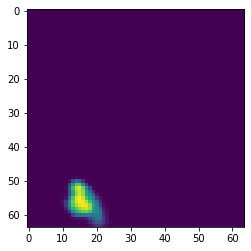

In [48]:
plt.imshow((seg3d==2).sum(0).sum(-1)[8:-56,48:-16])

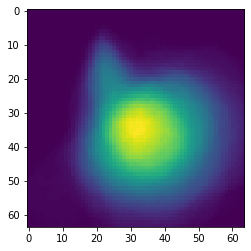

In [83]:
plt.imshow((seg3d==1).sum(0).sum(-1)[56:-8,48:-16])

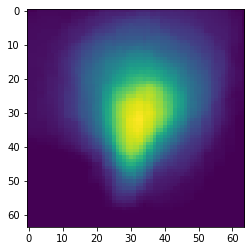

In [51]:
plt.imshow((seg3d==1).sum(0).sum(-2)[8:-56,40:-24])

In [84]:
best_all = torch.zeros(67,128,128,128)
combined_all = torch.zeros(67,128,128,128)

import time
t0 = time.time()
for fix in range(67):
    print(fix,time.time()-t0,'sec (total)')
    before = torch.zeros(30,2)
    after = torch.zeros(30,2)
    combined = torch.zeros(3,64,64,64)
    mov_all = torch.zeros(30,128,128,128)


    for i in range(30):
        disp = convexAdam(img3d[fix,56:-8,48:-16,40:-24],img3d_t2[i,56:-8,48:-16,40:-24])
        warped_one_hot = F.grid_sample(F.one_hot(seg3d_t2[i,56:-8,48:-16,40:-24].long(),3).permute(3,0,1,2).float().cuda().view(1,3,H,W,D),F.affine_grid(torch.eye(3,4).cuda().unsqueeze(0),(1,1,H,W,D))+disp.cuda(),mode='bilinear')
        combined += warped_one_hot.squeeze().cpu()
        warped_seg = warped_one_hot.argmax(1).squeeze()
        mov_all[i,56:-8,48:-16,40:-24] = warped_seg
        before[i] = (dice_coeff(seg3d[fix,56:-8,48:-16,40:-24],seg3d_t2[i,56:-8,48:-16,40:-24],3))
        after[i] = (dice_coeff(seg3d[fix,56:-8,48:-16,40:-24],warped_seg.squeeze().cpu(),3))
    combined = F.avg_pool3d(F.avg_pool3d(F.avg_pool3d(combined.unsqueeze(0),3,stride=1,padding=1),3,stride=1,padding=1),3,stride=1,padding=1).squeeze()
    combined[0] *= 0.66
    print('before',before.mean(0),before.max(0)[0])
    print('after',after.mean(0),after.max(0)[0],after.min(0)[0],)
    print('combined',dice_coeff(seg3d[fix,56:-8,48:-16,40:-24],(combined[:,:,:,:].argmax(0)).squeeze().cpu(),3))
    idx_best = torch.argmax(after[:,0])
    best_all[fix] = mov_all[idx_best]
    combined_all[fix,56:-8,48:-16,40:-24] = combined[:,:,:,:].argmax(0).cpu()

0 0.0003094673156738281 sec (total)
before tensor([0.3380, 0.5127]) tensor([0.6481, 0.7113])
after tensor([0.5045, 0.4498]) tensor([0.8667, 0.5619]) tensor([0.0000, 0.2416])
combined tensor([0.7994, 0.4373])
1 3.7200348377227783 sec (total)
before tensor([0.1036, 0.3853]) tensor([0.3723, 0.5042])
after tensor([0.1377, 0.3821]) tensor([0.5427, 0.4677]) tensor([0.0000, 0.2778])
combined tensor([0.2046, 0.3960])
2 7.3712568283081055 sec (total)
before tensor([0.1672, 0.5298]) tensor([0.4667, 0.6609])
after tensor([0.2705, 0.4719]) tensor([0.7196, 0.6538]) tensor([0.0000, 0.2530])
combined tensor([0.2666, 0.3874])
3 11.03656268119812 sec (total)
before tensor([0.4186, 0.5803]) tensor([0.8167, 0.7670])
after tensor([0.5701, 0.4933]) tensor([0.8617, 0.6657]) tensor([0.0000, 0.3488])
combined tensor([0.8981, 0.4234])
4 14.757563829421997 sec (total)
before tensor([0.3197, 0.5645]) tensor([0.7183, 0.7030])
after tensor([0.4456, 0.4215]) tensor([0.8818, 0.6061]) tensor([0.0000, 0.2113])
combine

IndexError: index 63 is out of bounds for dimension 0 with size 63

In [85]:
torch.save({'combined_all':combined_all,'best_all':best_all,'valid_right_t1':valid_left_t1},'optimal_reg_right.pth')
!zip -r optimal_reg_right.zip optimal_reg_right.pth 

  adding: optimal_reg_right.pth (deflated 100%)


In [86]:
!ls -l optimal_reg_right.zip

-rw-r--r-- 1 heinrich bvstudents 1424716 Nov 30 19:38 optimal_reg_right.zip


In [63]:
print('after',after.mean(0),after.max(0)[0],after.min(0)[0],)



after tensor([0.5465, 0.4619]) tensor([0.8175, 0.5900]) tensor([0.0000, 0.0335])


In [59]:
#

before tensor([0.4457, 0.5975]) tensor([0.7570, 0.7748])
after tensor([0.6494, 0.5528]) tensor([0.8979, 0.7062])
combined tensor([0.9241, 0.0000])


In [61]:
for i in range(5,10):
    print(dice_coeff(seg3d[fix,8:-56,48:-16,40:-24],(combined[:,:,:,1]>i).squeeze().cpu(),3))

tensor([0.8586, 0.0000])
tensor([0.8488, 0.0000])
tensor([0.8373, 0.0000])
tensor([0.8250, 0.0000])
tensor([0.8094, 0.0000])


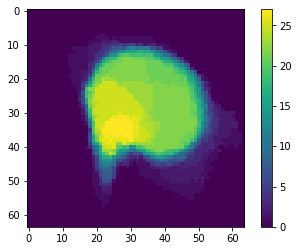

In [55]:
plt.imshow(combined[:,:,32,1])
plt.colorbar()

In [ ]:
all_centre = torch.zeros(3,60)
cross_dice = torch.zeros(31,60,2)

all_warped2 = torch.zeros(31,96,96,96)#all_warped[2]/all_warped[3]*31


for nu1 in range(31):
    all_disp = torch.zeros(31,96,96,96,3)
    all_warped = torch.zeros(4,96,96,96)
    grid = torch.stack(torch.meshgrid((torch.arange(96),torch.arange(96),torch.arange(96)))).float()
    #print(grid.shape)
    centre0 = torch.sum(grid.view(3,-1)*(seg2d_t2[nu1*96:(1+nu1)*96]==2).view(1,-1).float(),1)/torch.sum(seg2d_t2[nu1*96:(1+nu1)*96]==2)
    all_dice = torch.zeros(2)
    torch.cuda.synchronize()
    t0 = time.time()
    for nu in range(60):
        img_fixed = img2d_t2[nu1*96:(1+nu1)*96].view(96,96,96)
        img_moving = img2d[nu*96:(nu+1)*96].view(96,96,96)
        
        all_disp[nu] = disp
        warped = F.grid_sample(seg2d[nu*96:(nu+1)*96].float().cuda().view(1,1,96,96,96),F.affine_grid(torch.eye(3,4).cuda().unsqueeze(0),(1,1,96,96,96))+disp.cuda(),mode='nearest')
        warped_onehot = F.grid_sample(F.one_hot(seg2d[nu*96:(nu+1)*96],3).permute(3,0,1,2).float().cuda().view(1,3,96,96,96),F.affine_grid(torch.eye(3,4).cuda().unsqueeze(0),(1,1,96,96,96))+disp.cuda(),mode='bilinear')
        warped_mind = F.grid_sample(mindssc_mov.float(),F.affine_grid(torch.eye(3,4).cuda().unsqueeze(0),(1,1,96,96,96))+disp.cuda(),mode='bilinear')


        similarity = torch.exp(-1.5*F.avg_pool3d((mindssc_fix-warped_mind).pow(2),1,stride=1,padding=0).sum(1).squeeze(0))


        #print(dice_coeff(seg2d[nu1*96:(1+nu1)*96],seg2d_t2[nu*96:(nu+1)*96],3))
        #nib.save(nib.Nifti1Image(warped.squeeze().byte().cpu().data.numpy(),np.eye(4)),'crossmoda_reg_F'+str(nu1)+'_T2_M'+str(nu)+'_T1.nii.gz')
        all_warped[:3] += (similarity*warped_onehot).squeeze(0).cpu()#F.one_hot(warped.squeeze().long(),3).cpu().permute(3,0,1,2)
        all_warped[3] += similarity.squeeze().cpu()
        d = (dice_coeff(seg2d_t2[nu1*96:(1+nu1)*96],warped.squeeze().cpu(),3))
        all_dice += d
        cross_dice[nu1,nu] = d
    centre = torch.sum(grid.view(3,-1)*(all_warped[2]).view(1,-1).float(),1)/torch.sum(all_warped[2])
    print('localisation',centre,(centre-centre0).norm(),'dice',all_dice/40)
    torch.cuda.synchronize()
    t1 = time.time()
    print('time for 31 registrations',t1-t0,'sec')
    all_centre[:,nu1] = centre
    all_warped2[nu1] = all_warped[2]/all_warped[3]*31
    